
## objectifs : detection de communauté dans un Graphe 
<p> <ol> 
<li> Ecrire l'algorithe de Girvan Newman en python</li> 
<li>visualiser les communaute dans le graphe </li>
<li> appliquer cl'algorithme de Givann Newman disponible dans la library networkx </li>
</ol></p>


### 1. l'algorithme de Girvan en python 

In [47]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def girvan_newman(G):
    # nous faisons une Copie temporaire du graphe
    G_temp = G.copy()
    
    # Initialialisation  la liste des communautés
    communities = []
    
    while G_temp.number_of_edges() > 0:
        # Nous effecuons le  Calcule pour  les mesures de centralité des arêtes
        edge_betweenness = nx.edge_betweenness_centrality(G_temp)
        
        # puis nous trions  les arêtes par ordre décroissant de centralité d'intermédiarité
        sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
        
        # Ensuite nous supprimons  l'arête avec la plus haute centralité d'intermédiarité
        edge_to_remove = sorted_edges[0][0]
        G_temp.remove_edge(*edge_to_remove)
        
        # et enfin nous trouvons le nombre  de composantes connexes du graphe restant
        components = list(nx.connected_components(G_temp))
        
        # Si le nombre de composantes est différent de celui du graphe d'origine, une communauté a été détectée
        if len(components) != len(communities):
            communities = components
            yield communities
    
    # enregistrons aussi la dernière détection de communauté, lorsque le graphe est completement déconnecté
    yield communities



In [48]:
# pour notre exemple d'utilisation nous allons utiliser un graphe de donnee de la libraty networkx 
G = nx.karate_club_graph()
communities = list(girvan_newman(G))


### 2. Visualisation des communautés

In [49]:
# Calcul de la modularité en fonction de la mesure de la force de la division d'un réseau en modules.
df_modularity= pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

In [50]:
# definition d'une fonction pour créer une liste de couleurs de nœuds pour chaque communauté 

def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["red", "yellow", "gray", "purple", "skyblue"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


In [52]:
# Definition d'une fonction pour tracer le graphe avec coloration des nœuds basée sur les communautés

def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Visualisation de {len(communities)} communautés  avec une modularité {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )



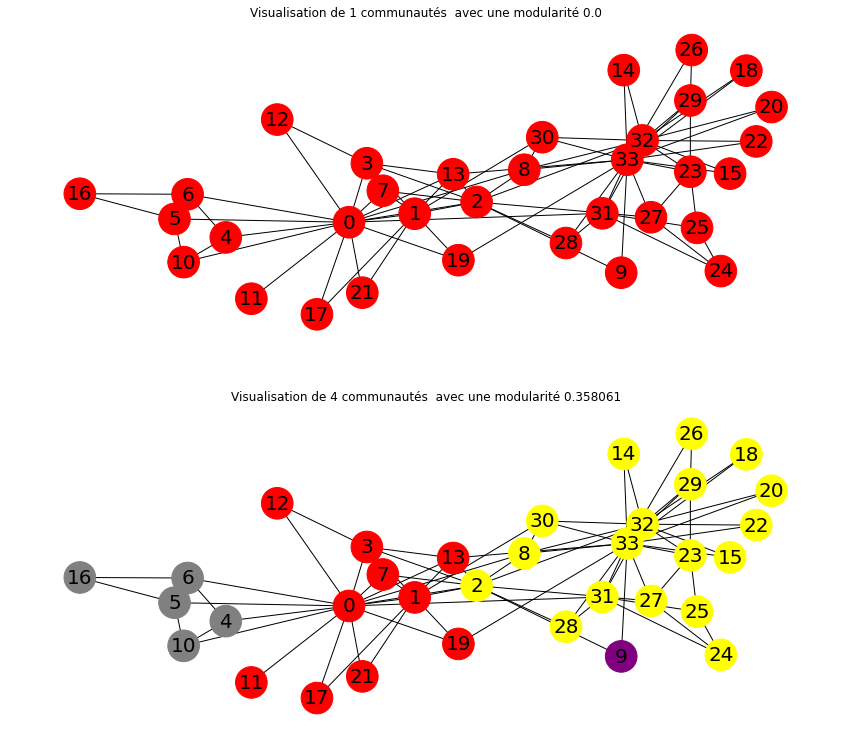

In [53]:

#Tracer le graphe avec coloration basée sur les communautés"
fig, ax = plt.subplots(2, figsize=(15, 20))
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)


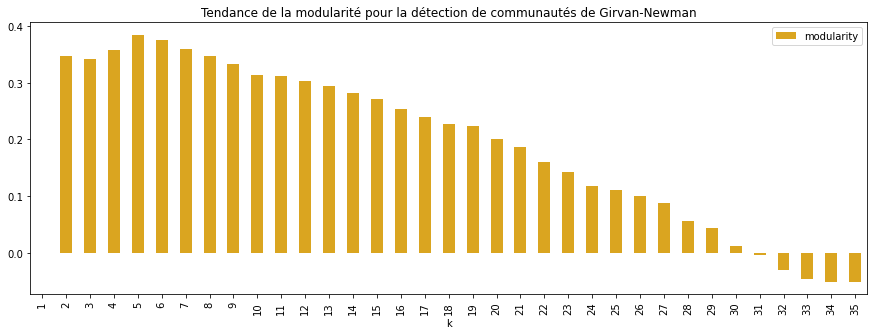

In [54]:
# Tracons  le changement de modularité à mesure que les arêtes importantes sont supprimées
df_modularity.plot.bar(
    x="k",
    figsize=(15, 5),
    color="Goldenrod",
    title="Tendance de la modularité pour la détection de communautés de Girvan-Newman",
)
plt.show()

### 3. Application de l'algorithme de Givann Newman disponible dans la library networkx

In [55]:
communities_second = list(nx.community.girvan_newman(G))

In [56]:
df_modularity_second= pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

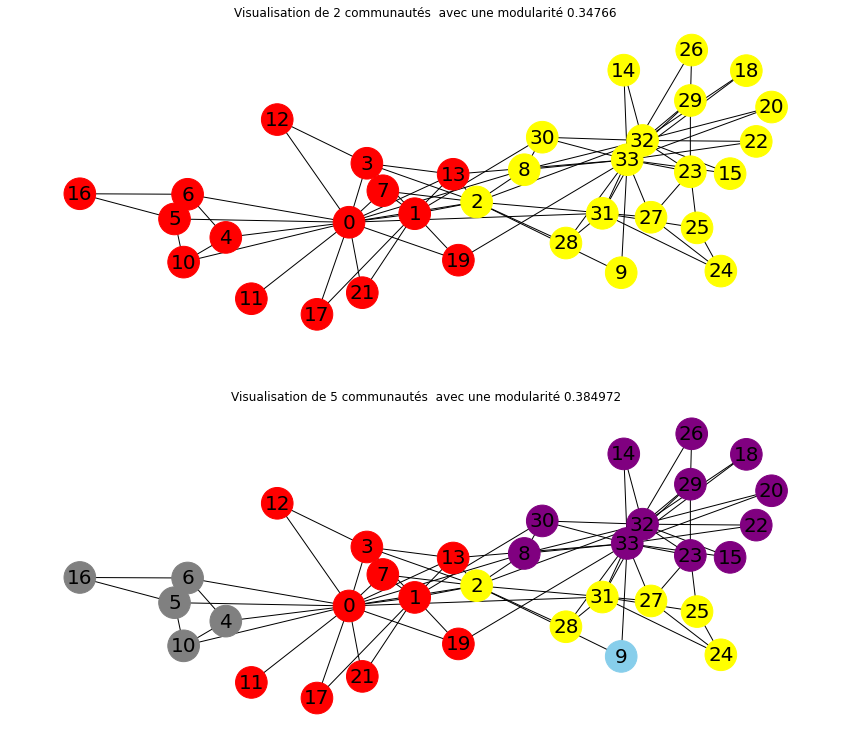

In [57]:
#Tracer le graphe avec coloration basée sur les communautés"
fig, ax = plt.subplots(2, figsize=(15, 20))
visualize_communities(G, communities_second[0], 1)
visualize_communities(G, communities_second[3], 2)


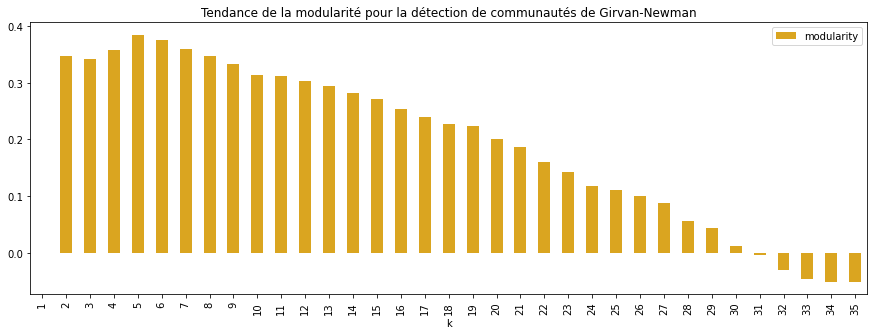

In [58]:
df_modularity_second.plot.bar(
    x="k",
    figsize=(15, 5),
    color="Goldenrod",
    title="Tendance de la modularité pour la détection de communautés de Girvan-Newman",
)
plt.show()

### Conclusion 
<p><I>
En conclusion, même si des bibliothèques comme NetworkX proposent déjà de nombreux algorithmes prêts à l'emploi pour l'analyse des réseaux, il est parfois utile de les implémenter soi-même. Cela nous permet de mieux comprendre comment ces algorithmes fonctionnent réellement. En recréant nos propres versions, nous pouvons explorer en profondeur les principes fondamentaux derrière chaque algorithme, découvrir leurs subtilités et leurs limites, et éventuellement les personnaliser pour répondre à nos besoins spécifiques. En fin de compte, cette approche nous aide à développer nos compétences en analyse de réseaux et à approfondir notre compréhension de ce domaine fascinant.</I></p>